# Introduction

In [ ]:
"""
What? SMV and the C parameter - soften the margins

VanderPlas, Jake. Python data science handbook: Essential tools for working with data. O'Reilly Media, Inc.", 2016.
https://github.com/jakevdp/PythonDataScienceHandbook     
"""

# Import modules

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC 
from sklearn.datasets import make_circles
from mpl_toolkits import mplot3d
from sklearn.datasets import make_blobs 

# Helper function

In [16]:
def plot_svc_decision_function(model, ax=None, plot_support=True): 
    """Plot the decision function for a two-dimensional SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
              levels=[-1, 0, 1], alpha=0.5,
              linestyles=['--', '-', '--'])
    # plot support vectors
    if plot_support: ax.scatter(model.support_vectors_[:, 0],
                  model.support_vectors_[:, 1],
                  s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim) 

# Creating dataset

In [ ]:
"""
Dataset have most of the time some overlapping area. How do we deal with them while using SVMs?
"""

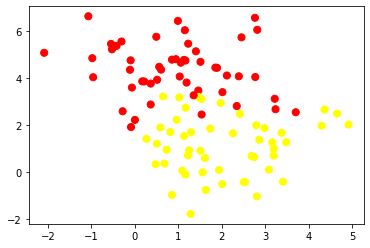

In [5]:
X, y = make_blobs(n_samples=100, centers=2,
                              random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# Using the C parameter - soften the margins

In [ ]:
"""
To handle this case, the SVM implementation has a bit of a fudge-factor that “softens” the margin; that is, 
it allows some of the points to creep into the margin if that allows a better fit. The hardness of the margin 
is controlled by a tuning parameter, most often known as C. For very large C, the margin is hard, and points 
cannot lie in it. For smaller C, the margin is softer, and can grow to encompass some points
"""

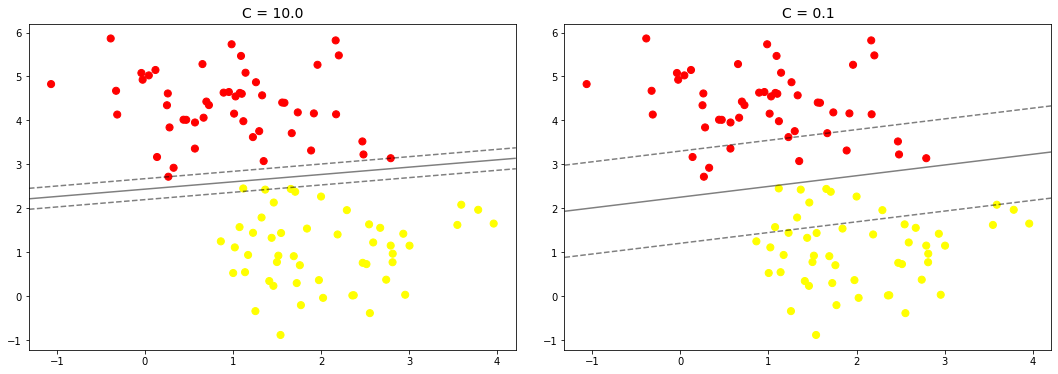

In [17]:
X, y = make_blobs(n_samples=100, centers=2,
                              random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y) 
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') 
    plot_svc_decision_function(model, axi) 
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)